# Analyzing the Fault of Failure to the Cleveland Browns this Season
## Paul Keren
### 12/4/2024
The purpose of this analysis is to figure out what the problem with the Cleveland Browns football team this year. Last season Cleveland had a record of 11-6 and made the playoffs, but this year they have a record of 3-9 and are one of the worst teams in the NFL. So my goal for this project is to find what is wrong with the Browns this year. The main question is why is this team so bad with the same very good talent. The motivation comes from being a Cleveland sports fan and seeing other professional Cleveland teams succeeding, and knowing that it is possible to be a good team.

The starting point for me came from watching the Browns every week and getting super frustrated every week. The Browns returned most of their talent from a successful 2023 campaign so I was not sure where the problem was. There aren't any others I am following in this analysis.


In [53]:
import urllib
import requests
import pandas as pd
import json
import base64
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [54]:
rushstat = pd.read_csv('RUSHING - Sheet1.csv')
rushstat.head()

,No.,Player,Age,Pos,G,GS,Att,Yds,TD,1D,YBC,YBC/Att,YAC,YAC/Att,BrkTkl,Att/Br
0,34,Jerome Ford,24,RB,17,12,204,813,4,33,446,2.2,367,1.8,26,7.8
1,27,Kareem Hunt,28,RB,15,2,135,411,9,38,236,1.7,175,1.3,2,67.5
2,20,Pierre Strong,25,RB,17,1,63,291,1,10,133,2.1,158,2.5,5,12.6
3,24,Nick Chubb,28,RB,2,2,28,170,0,8,100,3.6,70,2.5,2,14
4,4,Deshaun Watson,28,QB,6,6,26,142,1,10,90,3.5,52,2,3,8.7


The rushing stats for the Cleveland Browns from the past 2 years from www.pro-football-reference.com.

In [55]:
recstat = pd.read_csv('24RECEIVING - Sheet1 (1).csv')
recstat.head()

,No.,Player,Age,Pos,G,GS,Tgt,Rec,Yds,TD,...,YBC/R,YAC,YAC/R,ADOT,BrkTkl,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,85,David Njoku*,27,TE,16,16,123,81,882,6,...,3.5,599,7.4,4.5,10,NaN,NaN,NaN,NaN,NaN
1,2,Amari Cooper*,29,WR,15,15,128,72,1250,5,...,13.6,271,3.8,14.3,2,NaN,NaN,NaN,NaN,NaN
2,8,Elijah Moore,23,WR,17,12,104,59,640,2,...,7.6,191,3.2,11,4,NaN,NaN,NaN,NaN,NaN
3,34,Jerome Ford,24,RB,17,12,63,44,319,5,...,0.3,304,6.9,0.5,4,NaN,NaN,NaN,NaN,NaN
4,19,Cedric Tillman,23,WR,14,3,44,21,224,0,...,6.5,88,4.2,10.6,2,NaN,NaN,NaN,NaN,NaN


The receiving stats for the Cleveland Browns from the past 2 years from www.pro-football-reference.com

In [56]:
recstat

,No.,Player,Age,Pos,G,GS,Tgt,Rec,Yds,TD,...,YBC/R,YAC,YAC/R,ADOT,BrkTkl,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,85,David Njoku*,27,TE,16,16,123,81,882,6,...,3.5,599,7.4,4.5,10,NaN,NaN,NaN,NaN,NaN
1,2,Amari Cooper*,29,WR,15,15,128,72,1250,5,...,13.6,271,3.8,14.3,2,NaN,NaN,NaN,NaN,NaN
2,8,Elijah Moore,23,WR,17,12,104,59,640,2,...,7.6,191,3.2,11,4,NaN,NaN,NaN,NaN,NaN
3,34,Jerome Ford,24,RB,17,12,63,44,319,5,...,0.3,304,6.9,0.5,4,NaN,NaN,NaN,NaN,NaN
4,19,Cedric Tillman,23,WR,14,3,44,21,224,0,...,6.5,88,4.2,10.6,2,NaN,NaN,NaN,NaN,NaN
5,84,Jordan Akins,31,TE,17,4,23,15,132,0,...,4.9,58,3.9,4.7,3,NaN,NaN,NaN,NaN,NaN
6,27,Kareem Hunt,28,RB,15,2,21,15,84,0,...,-0.9,98,6.5,-0.3,0,NaN,NaN,NaN,NaN,NaN
7,18,David Bell,23,WR,15,3,23,14,167,3,...,6.7,73,5.2,6.2,1,NaN,NaN,NaN,NaN,NaN
8,88,Harrison Bryant,25,TE,17,9,20,13,81,3,...,3.5,35,2.7,4.1,1,NaN,NaN,NaN,NaN,NaN
9,11,Donovan Peoples-Jones,24,WR,7,5,18,8,97,0,...,9.4,22,2.8,10.9,0,NaN,NaN,NaN,NaN,NaN


Expanded version of receiving stats

In [57]:
pastat = pd.read_csv('23PASSING - Sheet1 (2).csv')
pastat.head()

,No.,Player,Age,Pos,G,GS,Cmp,Att,Yds,Bats,ThAwy,Spikes,Drops,Drop%,BadTh,Bad%,OnTgt,OnTgt%
0,15,Joe Flacco,38,QB,5,5,123,204,1616,3,7,0,9,4.60%,35,17.80%,138,70.10%
1,4,Deshaun Watson,28,QB,6,6,105,171,82,4,5,1,12,7.30%,34,20.60%,118,71.50%
2,17,Dorian Thompson-Robinson,24,QB,8,3,60,112,166,2,4,2,11,10.40%,21,19.80%,74,69.80%
3,10,P.J. Walker,28,QB,6,2,54,111,440,4,3,1,6,5.60%,32,29.90%,61,57.00%
4,12,Jeff Driskel,30,QB,1,1,13,26,674,2,1,0,4,16.00%,4,16.00%,18,72.00%


The passing stats for the Cleveland Browns from the past 2 years from www.pro-football-reference.com.

In [58]:
pastat

,No.,Player,Age,Pos,G,GS,Cmp,Att,Yds,Bats,ThAwy,Spikes,Drops,Drop%,BadTh,Bad%,OnTgt,OnTgt%
0,15,Joe Flacco,38,QB,5,5,123,204,1616,3,7,0,9,4.60%,35,17.80%,138,70.10%
1,4,Deshaun Watson,28,QB,6,6,105,171,82,4,5,1,12,7.30%,34,20.60%,118,71.50%
2,17,Dorian Thompson-Robinson,24,QB,8,3,60,112,166,2,4,2,11,10.40%,21,19.80%,74,69.80%
3,10,P.J. Walker,28,QB,6,2,54,111,440,4,3,1,6,5.60%,32,29.90%,61,57.00%
4,12,Jeff Driskel,30,QB,1,1,13,26,674,2,1,0,4,16.00%,4,16.00%,18,72.00%
5,4,Deshaun Watson,29,QB,7,7,137,216,1115,5,5,0,20,9.50%,34,16.10%,166,78.70%
6,5,Jameis Winston,30,QB,9,4,107,172,1148,6,1,1,6,3.50%,30,17.60%,96,56.50%
7,17,Dorian Thompson-Robinson,25,QB,3,0,11,25,1266,1,4,0,1,4.80%,3,14.30%,12,57.10%


The passing stats for the Cleveland Browns from the past 2 years expanded

In [59]:
defstat = pd.read_csv('DEFENSE - Sheet1.csv')
defstat.head()

,No.,Player,Age,Pos,G,GS,Int,Tgt,Cmp,Cmp%,...,Rat,DADOT,Air,YAC,Bltz,Hrry,QBKD,Sk,Prss,Unnamed: 23
0,23,Martin Emerson,23,CB,16,12,4,79,37,46.80%,...,46.3,12.8,344,155,0,0,0,0,0,NaN
1,0,Greg Newsome II,23,CB,14,13,2,67,38,56.70%,...,74.8,7.5,161,289,14,1,0,0.5,2,NaN
2,21,Denzel Ward*,26,CB,13,11,2,66,32,48.50%,...,56.2,10.5,187,151,2,0,0,0,0,NaN
3,6,Jeremiah Owusu-Koramoah*,24,LB,16,13,2,45,35,77.80%,...,93.5,2.9,71,179,60,1,0,3.5,5,NaN
4,22,Grant Delpit,25,S,13,13,1,33,24,72.70%,...,99.8,4.7,92,142,33,3,2,1.5,7,NaN


In [60]:
defstat

,No.,Player,Age,Pos,G,GS,Int,Tgt,Cmp,Cmp%,...,Rat,DADOT,Air,YAC,Bltz,Hrry,QBKD,Sk,Prss,Unnamed: 23
0,23,Martin Emerson,23,CB,16,12,4,79,37,46.80%,...,46.3,12.8,344,155,0,0,0,0,0,NaN
1,0,Greg Newsome II,23,CB,14,13,2,67,38,56.70%,...,74.8,7.5,161,289,14,1,0,0.5,2,NaN
2,21,Denzel Ward*,26,CB,13,11,2,66,32,48.50%,...,56.2,10.5,187,151,2,0,0,0,0,NaN
3,6,Jeremiah Owusu-Koramoah*,24,LB,16,13,2,45,35,77.80%,...,93.5,2.9,71,179,60,1,0,3.5,5,NaN
4,22,Grant Delpit,25,S,13,13,1,33,24,72.70%,...,99.8,4.7,92,142,33,3,2,1.5,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,92,Sam Kamara,27,DE,7,0,0,0,0,NaN,...,NaN,NaN,0,0,0,1,0,0,1,5
60,51,Michael Hall,21,DT,4,0,0,0,0,NaN,...,NaN,NaN,0,0,1,6,2,0,8,5
61,52,Elerson Smith,26,LB,2,0,0,0,0,NaN,...,NaN,NaN,0,0,0,1,0,0,1,2
62,42,Tony Fields,25,LB,1,0,0,0,0,NaN,...,NaN,NaN,0,0,1,0,0,0,0,2


The defensive stats for the Cleveland Browns from the past 2 years from www.pro-football-reference.com. 

The collection of all of this data was simple: First I would go to pro-football-reference.com and the reason I use this website is beacause it provides a large amount of stats and because it just straight stats with no opinions. Next I will chose the types of data I am looking for whether it is passing, rushing, or defensive stats. Saving those stats as a pdf is the next step, after that I will convert that pdf into a google sheet. Using that google sheet I will save it as a csv then drop that csv into my folder, then I able to easily call it. 

In [61]:
pastat['Yds_i'] = pastat['Yds'].astype('float64')

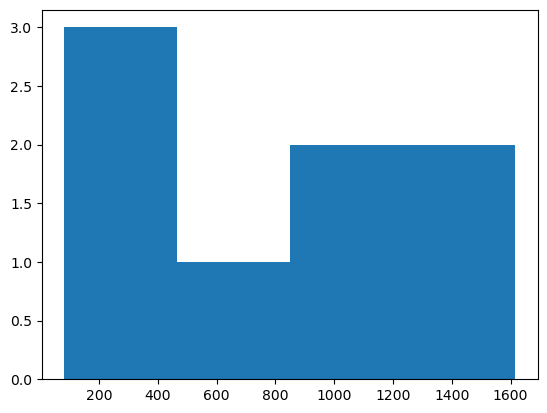

In [62]:
fig1, ax1 = plt.subplots(1)
ax1.hist(pastat['Yds'], bins = 4)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

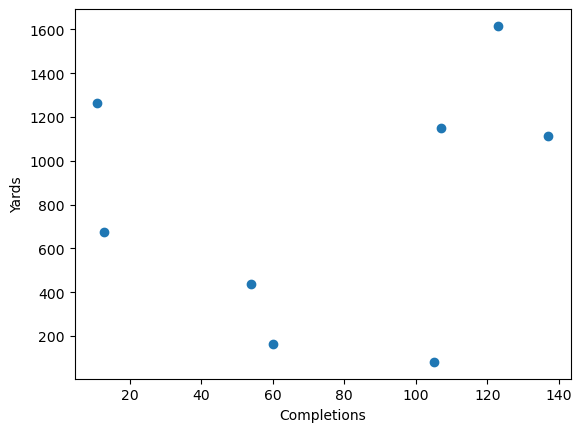

In [66]:
fig2, ax2 = plt.subplots()
ax2.scatter(pastat['Cmp'], pastat['Yds'])
ax2.set_xlabel('Completions')
ax2.set_ylabel('Yards')
plt.show

This graph shows that the more completions a quarterback has, the more completions they will have. 

In [67]:
y =[0, 82, 166, 440, 674, 1115, 1148, 1266, 1616]
x =[0, 11, 13, 54, 60, 105, 107, 123, 137]

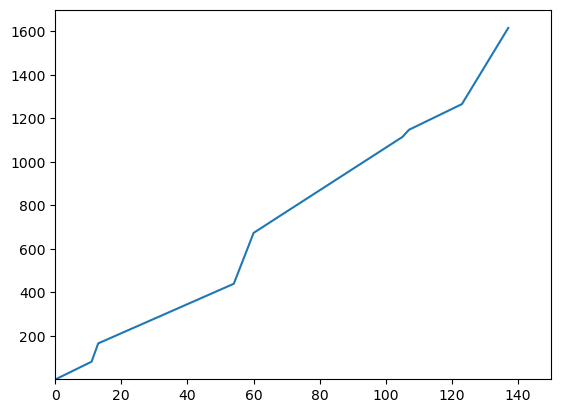

In [68]:
plt.plot(x, y)
plt.axis([0, 150, 1, 1700])

plt.show()

This graph shows that the more completions a quarterback has, the more completions they will have with a line.

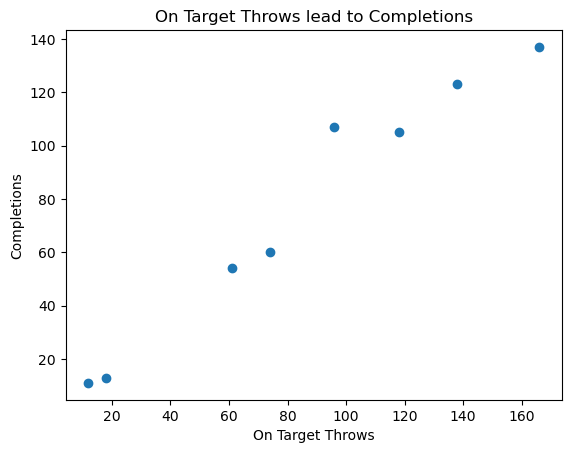

In [85]:
fig3, ax3 = plt.subplots()
ax3.scatter(pastat['OnTgt'], pastat['Cmp'])
ax3.set_xlabel('On Target Throws')
ax3.set_ylabel('Completions')
ax3.set_title('On Target Throws lead to Completions')
plt.show()

The results that I have come up with so far show a couple correlations from the passing stats from the Browns, but passing stats are the only ones I have interpreted. With this last scatter plot comparing the On Target throws from a Quarterback and the Completions that result you can see that the more On Target throws the more completions a quarterback will have. With the scatter plot above that one comparing Completions and yards, you can see that more completions will ofc equal more yards but once we get into yards per completion and yards per attempt we will start to see some deciphering data. 

The plan moving forward is to dive into each one of these main stats from the past 2 years is analyze what is different or what stands out. Then to look into that data and see what the cause is to figure out why the Browns are bad.

In [86]:
labels = 'Cooper', 'Njoku', 'Moore', 'Ford', 'Tillman', 'Bell'
sizes = [1250, 882, 640, 319, 224, 167]

Text(0.5, 1.0, '2023 Recieving Distribution')

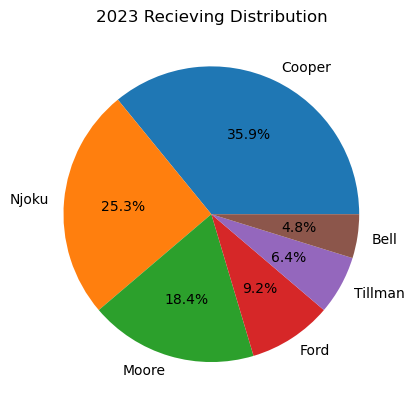

In [87]:
fig4, ax4 = plt.subplots()
ax4.pie(sizes, labels=labels, autopct='%1.1f%%')
ax4.set_title('2023 Recieving Distribution')

The chart above shows the distribution of receiving yards for the Browns in 2023.

In [88]:
labels = 'Jeudy', 'Moore', 'Njoku', 'Tillman', 'Cooper (6 games)', 'Akins'
sizes = [880, 447, 397, 339, 250, 229]

Text(0.5, 1.0, '2024 Recieving Distribution')

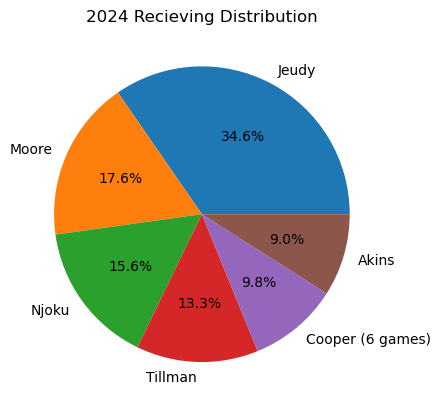

In [89]:
fig5, ax5 = plt.subplots()
ax5.pie(sizes, labels=labels, autopct='%1.1f%%')
ax5.set_title('2024 Recieving Distribution')

This pie chart shows the recieving yards for the Browns in 2024.

Conclusion from this is that after trading away Cooper 6 games into the season other recievers have stepped in like Jeudy or Tillman but Njoku has not been as effective.

In [90]:
teamstat = pd.read_csv('BROWNS_TEAM - Sheet1.csv')
teamstat.head()

,Overall Statistics\n CLE Offense,Value (rank),CLE Defense,Value (rank).1
0,Points/Game,18.2 (#29),Opp Points/Game,25.7 (#26)
1,Yards/Game,314.1 (#22),Opp Yards/Game,349.6 (#24)
2,Points/Play,0.274 (#31),Opp Points/Play,0.426 (#27)
3,Yards/Play,4.7 (#29),Opp Yards/Play,5.8 (#30)
4,3D Conversion %,29.24% (#32),Opp 3D Conv %,35.26% (#12)


In [91]:
#teamstat

The stats above show the Browns team stats and where they rank in the national football league this season from www.teamrankings.com.

In [92]:
teamstat23 = pd.read_csv('BROWNS_TEAM24 - Sheet1.csv')

teamstat23.head()

,Overall Statistics\n CLE Offense,Value (rank),CLE Defense,Value (rank).1
0,Points/Game,23.3 (#10),Opp Points/Game,22.6 (#26)
1,Yards/Game,335.9 (#16),Opp Yards/Game,274.9 (#1)
2,Points/Play,0.326 (#21),Opp Points/Play,0.388 (#27)
3,Yards/Play,4.8 (#28),Opp Yards/Play,4.7 (#4)
4,3D Conversion %,32.46% (#29),Opp 3D Conv %,28.99% (#1)


In [93]:
#teamstat23

The stats above show the Browns team stats and where they rank in the national football league in the 2023 season from www.teamrankings.com.

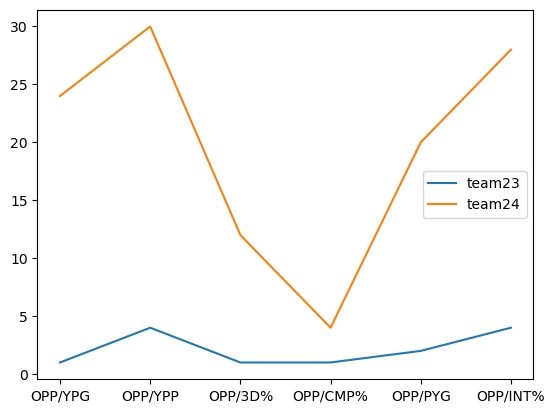

In [83]:
team23 = [1, 4, 1, 1, 2, 4]
team24 = [24, 30, 12, 4, 20, 28]
activity = ["OPP/YPG", "OPP/YPP", "OPP/3D%", "OPP/CMP%", "OPP/PYG", "OPP/INT%"]

fig, ax = plt.subplots()
ax.plot(activity, team23, label="team23")
ax.plot(activity, team24, label="team24")
ax.legend()

plt.show()

The plot above shows the comparison of the Browns defense in some critical stats such as: Opponent Yards per game(OPP/YPG), Opponent yards per play(OPP/YPP), Opponent 3rd Down Conversation percentage(OPP/3D%), Opponent Completion percentage(OPP/CMP%), Opponent passing yards per game(OPP/PYG), and Opponent interception percentage(OPP/INT%). The y-axis of the graph shows the rank in the National Football league in the corresponding year. team23 is the 2023 team and 24team is the 2024 team.

What we can take from this graph is that data we were focusing on before might not be as telling as this graph. This graph shows just some defensive stats, but you can take away that defense in 2023 was extremely more impressive and ranked high as number 1 in 3 of the 6 categories.

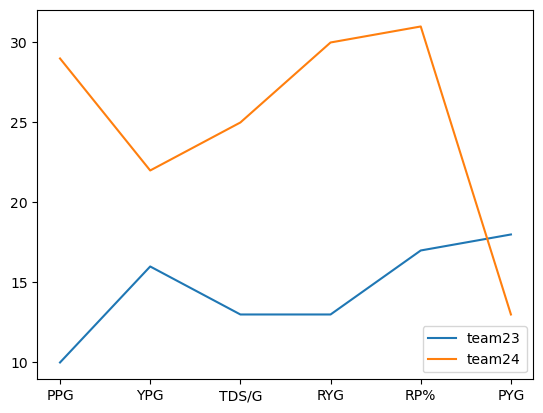

In [84]:
team23 = [10, 16, 13, 13, 17, 18]
team24 = [29, 22, 25, 30, 31, 13]
activity = ["PPG", "YPG", "TDS/G", "RYG", "RP%", "PYG"]

fig, ax = plt.subplots()
ax.plot(activity, team23, label="team23")
ax.plot(activity, team24, label="team24")
ax.legend()

plt.show()

The plot above shows the comparison of the Browns offense in stats such as: Points per game(PPG), Yards per game(YPG), Touchdowns per game(TDS/G), Rush yards per game(RYG), Rush play percentage(RP%), and Pass yards per game (PYG). team23 is the 2023 team and 24team is the 2024 team.

What we can take away from this graph is that it shows that the team in 2023 was ranked higher in every category except passing yards per game. 

From how my data has been shown with multiple and different types of graphs, the early conclusion I have come to is that the problem with the Browns may not be on the quarterbacks or the offense after all. From examing the data it is obvious in the Defense chart that the highly accomplished defense of 2023 has taken a large step back. The Browns were rated as the best defense in the NFL in 3 of those categories inlcuding: Opponent Yards per game, Opponent 3rd Down Conversation percentage, and Opponent Completion percentage. In 2024 the Browns fell back to #24, #12, and #4 in those categories. The fall from 1 to 4 is slight but the overall regression is undeniable. 

On the offensive standpoint there is also lots of drop-off in stats such as points per game and the rushing attack with rush yards per game down and the percentage of rush plays also down. The pass yards is now flipped but we can figure out that's from not being able to run the ball. 

The rushing attack the takeways on defense are my main concern though, last season Cleveland was getting an interception on 3.23% of plays and that ranked number 4 in the NFL, this season is only getting interceptions on 1.12% of plays ranking at number 28 in a league of 32. The rushing attack is another concern as we can see on the chart above that passing the ball is not a problem this year.

You might be able to atrribute some of the lack of rushing to their offensive line coach leaving in the offseason and their running backs coach also leaving. The Browns have a problem running the ball, when they can't run the ball they run a lot less, which leads to them passing the ball and taking less time off the clock. From teamrankings.com - The Browns lead the league in time of possession last season at 32:29 per game, this season though they fall back down the number 11 with 30:42 per game. Even though that is not a large slide the combination of less points per game, less yards, and less time with the ball the worse you are going to be. With the defense not getting takeaways very much this season, they are not there to bail out the extremely subpar offense. 

Some of the limitations of this analysis is that this data is just data and lot more goes into making a football team successful than good stats. Each player's own personalities and how they gel together is missed in this report, simply because I was not sure how to show that in data vizualization, so the problem could be internal and not based on their output of stats. The alternative approaches that are here are analyzing some years before 2023 to try to see if there was a pattern before the successful season or to look at a different part of the team like personnel, not really the players but the coaches, formations, and play style. The next steps for this project is looking at other data involving the team's plays and types of plays to try and find a theme in between the tape. Analyzing the out of the Browns in real-time might provide an answer we are looking for in terms of what is wrong with the Cleveland Browns?